In [1]:
!pip install robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

Library: [robin_stocks](https://readthedocs.org/projects/robin-stocks/downloads/pdf/latest/)

## Authentication and Login

In [2]:
login = r.login('kgraghav@mtu.edu','0214@Kgraghavan',store_session=True)

## List of Cryptocurrencies available

In [3]:
crypto_info=r.crypto.get_crypto_currency_pairs()
crypto_list=[]
for i in range(len(crypto_info)):
    crypto_list.append(crypto_info[i]['asset_currency']['code'])

## Read in Portfolio

In [4]:
df_portfolio=pd.read_csv('portfolio.csv')
df_portfolio.set_index('Parameters',inplace=True)
columns_list=df_portfolio.columns.tolist()
columns_dict={}
for stock in columns_list:
    stock_str_rep=stock.replace('-','.')
    columns_dict[stock]=stock_str_rep
df_portfolio.rename(columns=columns_dict,inplace=True)
df_portfolio.sort_values(by='weight',axis=1,ascending=False)

,GLDG,ZNGA,MRO,SSL,UONE,AM,XLE,SENS,XES,EH,UAL,KSS,BA,KO,H,RTX
Parameters,,,,,,,,,,,,,,,,
lingain,745.903685,1120.516569,738.455581,1052.583243,394.114235,112.723947,583.767893,120.601977,446.719713,166.976153,1.115067e-01,628.923614,18.867742,84.183919,8.733363,216.662031
score,2.160246,1.470873,1.098717,1.112178,2.483062,3.599598,1.085216,71.067515,1.296309,4.580751,9.285053e+06,1.650875,238.486900,1.733099,985.068292,1.367188
price_bound,0.373495,2.012926,1.566760,2.354760,0.949218,0.712777,3.898400,1.164989,5.086833,1.918487,6.176693e+00,10.510735,24.089175,1.723856,10.691254,4.563449
returns_ratio,1997.089853,556.660467,471.326637,447.002324,415.198684,158.147608,149.745519,103.521992,87.818830,87.035335,1.805282e-02,59.836311,0.783246,48.834657,0.816870,47.477692
weight,0.152382,0.135858,0.120173,0.105329,0.091326,0.078163,0.065840,0.054358,0.043717,0.033916,3.094052e-02,0.024955,0.022251,0.016835,0.014401,0.009556
suggested_investment,762.064676,679.423372,600.985401,526.750761,456.719453,390.891476,329.266832,271.845519,218.627538,169.612888,1.547335e+02,124.801571,111.274889,84.193585,72.019571,47.788931


In [5]:
port_stocks=df_portfolio.columns.tolist()

Total suggested equity value is: 5001.0


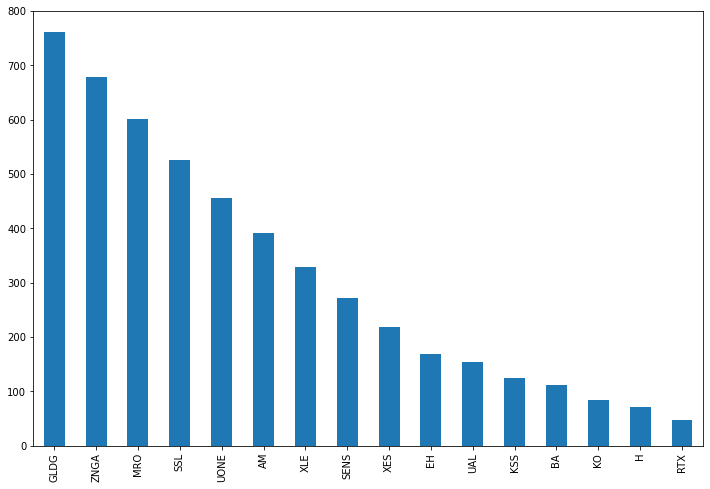

In [6]:
df_suggested_equity=df_portfolio.loc['suggested_investment',:]
df_suggested_equity.transpose().plot(kind='bar',figsize=(12,8));
total_port_equity=df_suggested_equity.sum()
print('Total suggested equity value is: {}'.format(total_port_equity))


## Print total stocks value

In [7]:
stocks_dict=r.account.build_holdings()
#print('Stocks are: {}'.format(stocks_dict))
tickers=stocks_dict.keys()
ticker_list=list(tickers)
for ticker in ticker_list:
    ticker.replace('-','.')
print(ticker_list)
###### Get crypto positions #####
crypto_holdings=r.get_crypto_positions()
print(float(crypto_holdings[3]['quantity']))

['AM', 'UONE', 'ZNGA', 'MSFT', 'TSLA', 'UAL', 'BA', 'GLDG', 'SSL', 'H', 'XLE', 'XES', 'MRO', 'KO', 'KSS', 'RTX', 'SENS', 'EH']
0.0


In [8]:
price_list=[float(stocks_dict[ticker]['equity']) for ticker in ticker_list]
for i in range(len(crypto_holdings)):
    if float(crypto_holdings[i]['quantity'])>0:
        crypto_ticker=crypto_holdings[i]['currency']['code'].replace('-USD','')
        crypto_qty=float(crypto_holdings[i]['quantity'])
        crypto_mark_price=float(r.get_crypto_quote(symbol=crypto_ticker,info='mark_price'))
        crypto_price=crypto_qty*crypto_mark_price
        price_list.append(crypto_price)
        ticker_list.append('{}.USD'.format(crypto_holdings[i]['currency']['code']))

In [9]:
######## Equity of stocks #################
df_allstock_equity=pd.DataFrame(index=['Price'],columns=ticker_list);
df_allstock_equity.loc['Price',:]=price_list;
allstock_equity_cols=df_allstock_equity.columns.tolist()
df_allstock_equity

,AM,UONE,ZNGA,MSFT,TSLA,UAL,BA,GLDG,SSL,H,XLE,XES,MRO,KO,KSS,RTX,SENS,EH
Price,386.71,466.48,677.94,2004.44,503.27,155.57,112.0,738.98,527.11,72.87,328.92,219.39,613.25,83.1,123.91,47.77,268.49,172.74


## Stocks common to portfolio and investment

In [10]:
comm_stocks=list(set(port_stocks).intersection(set(ticker_list)))
print('Stocks common to recommended and actual portfolio: ',comm_stocks)
port_stocks=[stock.replace('-','.') for stock in port_stocks]

Stocks common to recommended and actual portfolio:  ['MRO', 'ZNGA', 'KSS', 'H', 'AM', 'XLE', 'EH', 'KO', 'UONE', 'XES', 'GLDG', 'SENS', 'RTX', 'UAL', 'SSL', 'BA']


## Stocks not common

### Stock in recommended portfolio but not in actual portfolio

In [11]:
not_in_ticker_list=[stock for stock in port_stocks if stock not in ticker_list]
not_in_ticker_list

[]

### Stock in  actual portfolio but not in recommended portfolio

In [12]:
not_in_port_stocks=[ticker for ticker in ticker_list if ticker not in port_stocks]
not_in_port_stocks

['MSFT', 'TSLA']

## Share Price

In [13]:
share_price={}
share_price_values=[float(stocks_dict[ticker]['price']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_price[ticker]=share_price_values[i]
share_price=pd.DataFrame(share_price,index=['price'])
share_price

,AM,UONE,ZNGA,MSFT,TSLA,UAL,BA,GLDG,SSL,H,XLE,XES,MRO,KO,KSS,RTX,SENS,EH
price,10.11,5.73,8.99,294.735,909.179,50.51,217.85,1.6,22.335,107.85,69.1,64.15,21.375,60.655,59.5719,94.6766,2.005,16.82


## Share Quantity

In [14]:
share_quantity={}
share_quantities=[float(stocks_dict[ticker]['quantity']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_quantity[ticker]=share_quantities[i]
share_quantity=pd.DataFrame(share_quantity,index=['quantity'])
share_quantity

,AM,UONE,ZNGA,MSFT,TSLA,UAL,BA,GLDG,SSL,H,XLE,XES,MRO,KO,KSS,RTX,SENS,EH
quantity,38.25,81.41,75.41,6.800827,0.553545,3.08,0.5141,461.86,23.6,0.6757,4.76,3.42,28.69,1.37,2.08,0.5046,133.91,10.27


## Total Equity

Total Stocks equity value is: 7502.94
Total Common Stocks equity value is: 4995.23


,MSFT,GLDG,ZNGA,MRO,SSL,TSLA,UONE,AM,XLE,SENS,XES,EH,UAL,KSS,BA,KO,H,RTX
Equity,2004.44,738.98,677.94,613.25,527.11,503.27,466.48,386.71,328.92,268.49,219.39,172.74,155.57,123.91,112.0,83.1,72.87,47.77


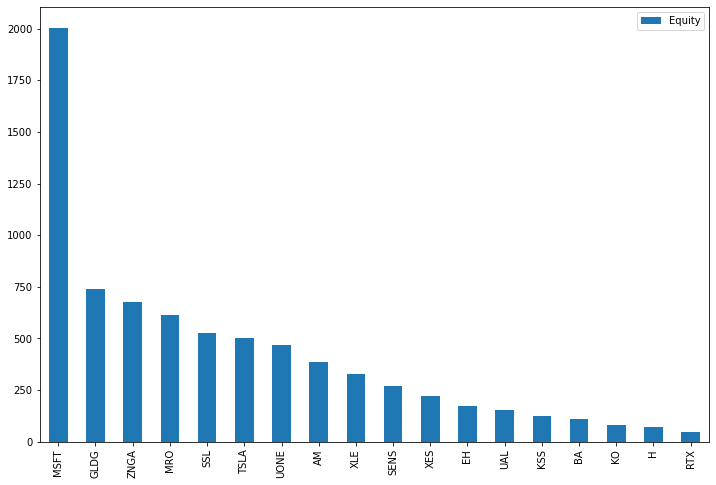

In [15]:
equity={}
total_equity=0
for i in range(len(ticker_list)):
    ticker=ticker_list[i]
    equity[ticker]=price_list[i]
    total_equity=total_equity+equity[ticker]
print('Total Stocks equity value is: {}'.format(total_equity))

equity_comm={}
total_comm_equity=df_allstock_equity.loc['Price',comm_stocks].sum()
print('Total Common Stocks equity value is: {}'.format(total_comm_equity))

df_equity=pd.DataFrame.from_dict(data=equity,orient='index',columns=['Equity'])
df_plot=df_equity.sort_values(by='Equity',axis=0,ascending=False)
if df_plot.shape[0]>0:
    df_plot.plot(kind='bar',figsize=(12,8))
else:
    print('no data to plot')
df_equity=df_equity.transpose()
df_equity.sort_values(by='Equity',axis=1,ascending=False)

## Equity Change

Total Common equity change value is: -5.769999999999726
Total Common Change Percent is: -0.11537692461507151
                          MRO      UONE        EH         H       UAL  \
Equity_Comm_Change  12.264599  9.760547  3.127112  0.850429  0.836462   

                         XES        BA       SSL       RTX       XLE  \
Equity_Comm_Change  0.762462  0.725111  0.359239 -0.018931 -0.346832   

                         KSS        KO      ZNGA      SENS        AM  \
Equity_Comm_Change -0.891571 -1.093585 -1.483372 -3.355519 -4.181476   

                         GLDG  
Equity_Comm_Change -23.084676  


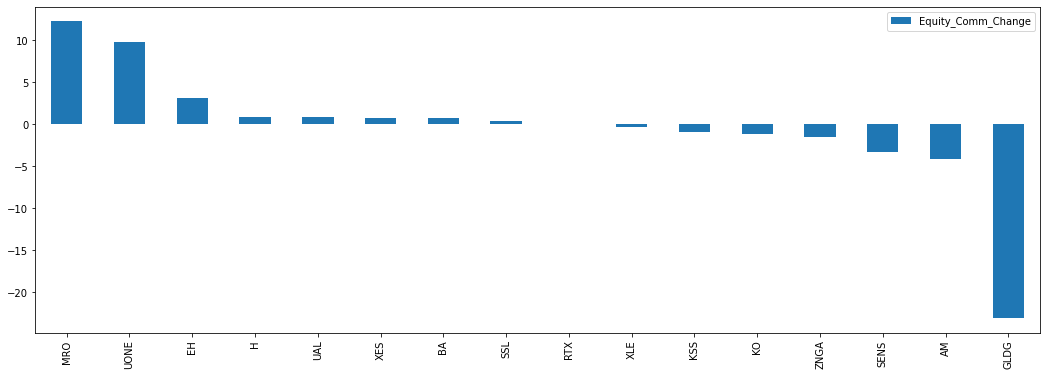

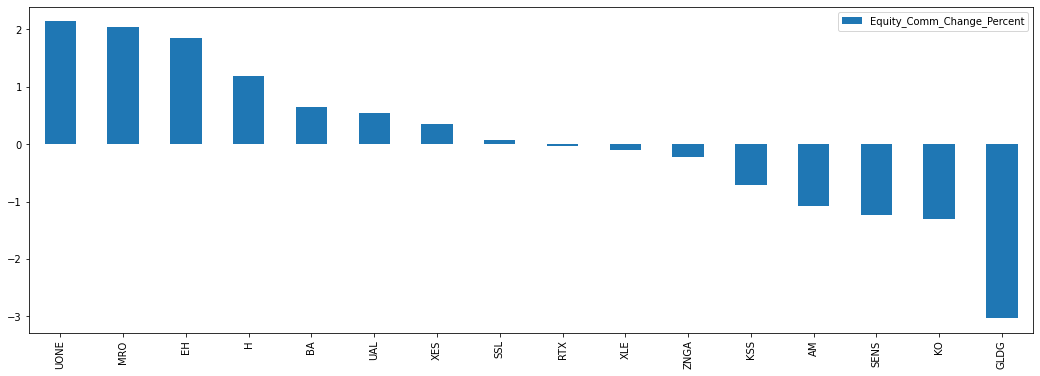

In [16]:
if len(ticker_list)>0:
    equity_change={}
    total_port_equity_change=0
    for i in range(len(ticker_list)):
        stock=ticker_list[i]
        if stock in df_equity.columns.tolist() and stock in df_suggested_equity.index.tolist():
            equity_change[stock]=df_equity.loc['Equity',stock]-df_suggested_equity[stock]
            total_port_equity_change=total_port_equity_change+equity_change[stock]

    equity_change_percent=total_port_equity_change/total_port_equity*100
    df_equity_change=pd.DataFrame.from_dict(data=equity_change,orient='index',columns=['Equity_Change']).transpose()
    df_equity_change_ratio=pd.DataFrame(df_equity_change.
                                 div(df_suggested_equity))
    df_equity_change_percent=df_equity_change_ratio*100
    df_equity_change_ratio.rename(index={'Equity_Change':'Equity_Change_Ratio'},inplace=True)
    df_equity_change_percent.rename(index={'Equity_Change':'Equity_Change_Percent'},inplace=True)

    if len(comm_stocks)>0:
        equity_comm_change={}
        total_equity_comm_change=0
        for i in range(len(comm_stocks)):
            comm_stock=comm_stocks[i]
            equity_comm_change[comm_stock]=df_equity.loc['Equity',comm_stock]-df_suggested_equity[comm_stock]
            total_equity_comm_change=total_equity_comm_change+equity_comm_change[comm_stock]
        print('Total Common equity change value is: {}'.format(total_equity_comm_change))


        equity_comm_change_percent=total_equity_comm_change/total_port_equity*100
        print('Total Common Change Percent is: {}'.format(equity_comm_change_percent))

        df_equity_comm_change=pd.DataFrame.from_dict(data=equity_comm_change,orient='index',columns=['Equity_Comm_Change']).transpose()
        df_equity_comm_change_ratio=pd.DataFrame(df_equity_comm_change.
                                         div(df_suggested_equity))
        df_equity_comm_change_percent=df_equity_comm_change_ratio*100
        df_equity_comm_change_ratio.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Ratio'},inplace=True)
        df_equity_comm_change_percent.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Percent'},inplace=True)
        ############################ Plots #####################################
        df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
        print(df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False))
        df_equity_comm_change_percent.sort_values(by='Equity_Comm_Change_Percent',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
    else:
        print('no common stocks')

else:
    print('no positions')

## Update Stop Loss

### Stop Loss Sell Limit Price

### Cancel Existing Stock Orders

### Update Stop Loss Sell orders for all stocks

## Sell and Buy Stocks

### Sell all portfolio stocks

### Sell all stocks

### Buy Portfolio Stocks

#### 